In [2]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.utils import estimator_html_repr
from IPython.display import display, HTML

# Define la función para obtener el HTML del estimador
def get_estimator_html(estimator):
    set_config(display='diagram')
    return estimator_html_repr(estimator)

# Cargar el pipeline guardado
pipeline = joblib.load('image_processing_pipeline.pkl')

# Obtener la representación HTML del pipeline
pipeline_html = get_estimator_html(pipeline)

# Mostrar la representación HTML en el cuaderno
display(HTML(pipeline_html))


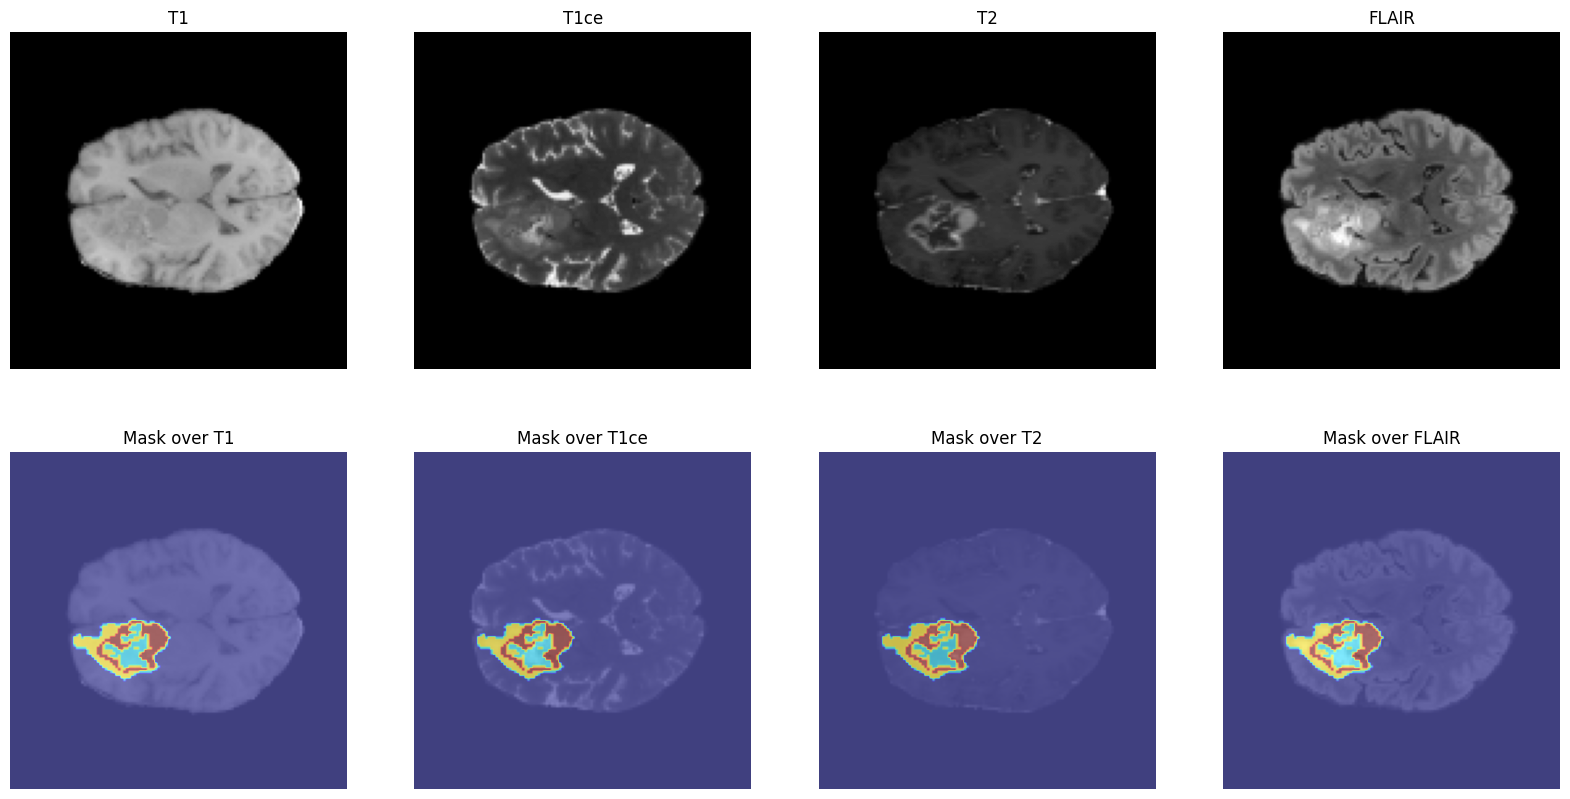

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Función para cargar datos de un archivo HDF5
def load_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as hf:
        images_sequence = hf['images'][:]
        masks_sequence = hf['masks'][:]
    return images_sequence, masks_sequence

# Cargar el archivo HDF5
file_path = 'C:/Users/lcres/Desktop/modelo/patient_0.h5'
images_sequence, masks_sequence = load_hdf5_file(file_path)

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Crear un subplot de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

# Visualizar las 4 modalidades de imagen en la primera fila
for i in range(4):
    axes[0, i].imshow(images_sequence[:, :, z_slice, i], cmap='gray')
    axes[0, i].set_title(modalities[i])
    axes[0, i].axis('off')

# Visualizar las máscaras correspondientes en la segunda fila
# Aquí visualizamos todas las clases de la máscara superpuestas
combined_mask = np.argmax(masks_sequence[:, :, z_slice], axis=-1)
for i in range(4):
    axes[1, i].imshow(images_sequence[:, :, z_slice, i], cmap='gray', alpha=0.5)
    axes[1, i].imshow(combined_mask, cmap='jet', alpha=0.5)
    axes[1, i].set_title(f'Mask over {modalities[i]}')
    axes[1, i].axis('off')

plt.show()
